# Week 4 Assignment

## Assignment Details
The `1962_2006_walmart_store_openings.csv` file is available here:
https://raw.githubusercontent.com/plotly/datasets/master/1962_2006_walmart_store_openings.csv

It contains information on Walmart store openings between the years 1962-2006. Some explanations on the meaning of variable names:

- `storenum`: the unique store number (storenumber is an id, not a count)	
- `OPENDATE`: the date the original store was opened
- `date_super`: the date the store became a super store
- `conversion`: whether the original store was converted to a super store
- `STRCITY`: the name of the city where the store is located
- `STRSTATE`: the state where the store is located

When answering the questions below, please make sure to examine the dataset carefully and understand if it needs further data aggregation, cleaning, or wrangling before you calcualte the answers to your questions.

#### [GRADED  TASK 1]
Import the dataset and ensure all columns of data are properly read into an appropriate data structure.

In [118]:
# Your answer to Graded Task 1 here:
import pandas as pd
url = 'https://raw.githubusercontent.com/plotly/datasets/master/1962_2006_walmart_store_openings.csv'
df = pd.read_csv(filepath_or_buffer=url, header=0)
df.head()

,storenum,OPENDATE,date_super,conversion,st,county,STREETADDR,STRCITY,STRSTATE,ZIPCODE,type_store,LAT,LON,MONTH,DAY,YEAR
0,1,7/1/62,3/1/97,1.0,5,7,2110 WEST WALNUT,Rogers,AR,72756,Supercenter,36.342235,-94.07141,7,1,1962
1,2,8/1/64,3/1/96,1.0,5,9,1417 HWY 62/65 N,Harrison,AR,72601,Supercenter,36.236984,-93.09345,8,1,1964
2,4,8/1/65,3/1/02,1.0,5,7,2901 HWY 412 EAST,Siloam Springs,AR,72761,Supercenter,36.179905,-94.50208,8,1,1965
3,8,10/1/67,3/1/93,1.0,5,29,1621 NORTH BUSINESS 9,Morrilton,AR,72110,Supercenter,35.156491,-92.75858,10,1,1967
4,7,10/1/67,NaN,NaN,5,119,3801 CAMP ROBINSON RD.,North Little Rock,AR,72118,Wal-Mart,34.813269,-92.30229,10,1,1967


#### [GRADED  TASK 2]

- which state has the `7th highest` total number of Walmart super stores?
- which city has the `5th highest` total number of Walmart stores (super stores and regular stores combined)?

In [120]:
# Your answer to Graded Task 2 here:
# Which state has the 7th highest total number of Walmart super stores?
super_stores_df = df[df['type_store'] == 'Supercenter']
super_stores = super_stores_df.groupby('STRSTATE')['type_store'].sum().sort_values(ascending=False)
seventh_highest_state = super_stores.index[6]
print(f"\n7th highest total number of Walmart super stores is in the state: {seventh_highest_state}")
# Which city has the 5th highest total number of Walmart stores (super stores and regular stores combined)?
super_store = df.groupby('STRCITY')['type_store'].sum().sort_values(ascending=False)
fifth_highest_city = super_store.index[4]
print(f"\n5th highest total number of Walmart stores is in the city: {fifth_highest_city}")


7th highest total number of Walmart super stores is in the state: AL

5th highest total number of Walmart stores is in the city: Marietta


#### [GRADED  TASK 3]
Write a function that takes as arguments:

1. the data frame you generated above from importing the Walmart dataset
2. a state abbreviaton (e.g. `AR`)

and, then, the function returns a pandas Data Frame with 2 columns: 
1. a column called `date` that contains the date (note that date must be properly ordered)
2. a column called `cumsum` that contains the `cumulative` (i.e. `running`) sum of the number of stores over time opened in that state


In [130]:
# Your answer to Graded Task 3 here:
# Write a function that takes as arguments and, then, the function returns a pandas Data Frame with 2 columns:
import pandas as pd

def cumulative_stores_by_state(df, state_abbreviation):
    states = df[df['STRSTATE'] == state_abbreviation]
    states['OPENDATE'] = pd.to_datetime(states['OPENDATE'])
    states = states.sort_values(by='OPENDATE')
    dataframe = pd.DataFrame()
    dataframe['date'] = states['OPENDATE']
    dataframe['cumsum'] = range(1, len(states) + 1)
    return dataframe

# Example with the state of Oregon
state_abbreviation = 'OR'
stores_by_state = cumulative_stores_by_state(df, state_abbreviation)
print(stores_by_state)

           date  cumsum
1719 1992-03-03       1
1722 1992-03-03       2
1731 1992-05-05       3
1759 1992-06-30       4
1775 1992-08-04       5
1697 1992-09-30       6
1739 1992-09-30       7
1685 1992-11-02       8
1784 1992-11-02       9
1827 1993-01-05      10
1851 1993-01-05      11
1848 1993-02-02      12
1869 1993-03-31      13
1917 1993-09-28      14
1932 1993-11-02      15
1973 1994-10-26      16
1991 1994-10-26      17
2043 1995-05-31      18
2148 1996-05-29      19
2129 1996-10-29      20
2134 1996-10-29      21
2185 1997-06-18      22
2201 1997-10-29      23
2358 2000-01-26      24
2529 2001-01-24      25
2571 2002-01-23      26
2575 2002-05-15      27
2866 2005-04-13      28
2883 2005-05-18      29


C:\Users\seanm\AppData\Local\Temp\ipykernel_3576\4064695952.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  states['OPENDATE'] = pd.to_datetime(states['OPENDATE'])
C:\Users\seanm\AppData\Local\Temp\ipykernel_3576\4064695952.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  states['OPENDATE'] = pd.to_datetime(states['OPENDATE'])


#### [GRADED  TASK 4]
Using any of the three plotting libraries we discussed (`matplotlib`, `seaborn`, or `bokeh`), plot the time series of cumulative store count over time in the state of Idaho (ID).

C:\Users\seanm\AppData\Local\Temp\ipykernel_3576\4064695952.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  states['OPENDATE'] = pd.to_datetime(states['OPENDATE'])
C:\Users\seanm\AppData\Local\Temp\ipykernel_3576\4064695952.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  states['OPENDATE'] = pd.to_datetime(states['OPENDATE'])


           date  cumsum
1687 1992-11-02       1
1707 1992-11-02       2
1712 1992-11-02       3
1824 1993-01-05       4
1836 1993-01-05       5
1905 1993-07-27       6
1899 1993-08-31       7
2131 1996-07-23       8
2206 1997-01-29       9
2384 2000-08-16      10
2385 2000-08-16      11
2386 2000-08-16      12
2414 2000-08-16      13
2502 2001-02-28      14
2592 2002-01-23      15
2546 2002-08-14      16
2949 2005-01-26      17


C:\Users\seanm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\seanm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


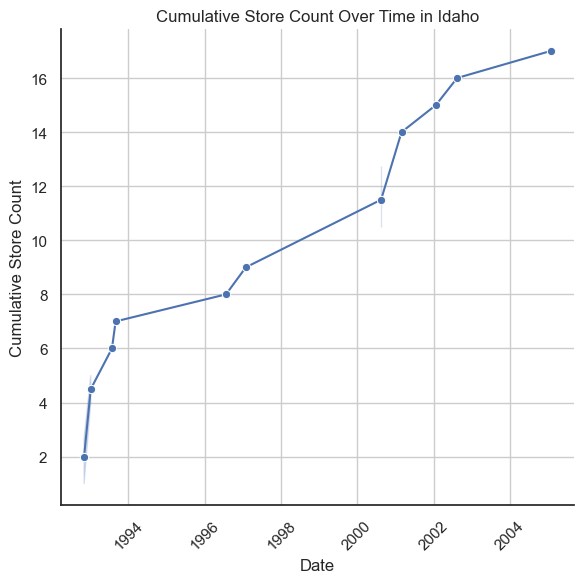

In [132]:
# Your answer to Graded Task 4 here:
#Using any of the three plotting libraries we discussed (matplotlib, seaborn, or bokeh), plot the time series of cumulative store count over time in the state of Idaho (ID).
state_abbreviation = 'ID'
stores_by_state = cumulative_stores_by_state(df, state_abbreviation)
print(stores_by_state)

stores_by_state['date'] = pd.to_datetime(stores_by_state['date'], format='%m/%d/%y', errors='coerce') #Reference: https://stackoverflow.com/questions/68888446/adding-date-to-pd-to-datetime
idaho_stores_sorted = stores_by_state.sort_values('date')

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

sns.relplot(x="date", y="cumsum", kind="line", marker='o',
            height=6, data=idaho_stores_sorted) #Reference:https://stackoverflow.com/questions/55308986/seaborn-how-to-make-subplots-with-multiple-line-charts-sns-relplot-doesnt-see

plt.title('Cumulative Store Count Over Time in Idaho')
plt.xlabel('Date')
plt.ylabel('Cumulative Store Count')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

#### [GRADED  TASK 5]
Using any of the three plotting libraries we discussed (`matplotlib`, `seaborn`, or `bokeh`), plot a bar chart that shows the `total` number of Walmart stores in each of the states that directly border the state of Utah (Arkansas (AR)).

In [134]:
#Using any of the three plotting libraries we discussed (matplotlib, seaborn, or bokeh), plot a bar chart that shows the total number of Walmart stores in each of the states that directly border the state of Utah (Arkansas (AR)).
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource

bordering_states = ['CO', 'WY', 'ID', 'NV', 'AZ', 'NM']
bordering_stores = df[df['STRSTATE'].isin(bordering_states)]

store_counts = bordering_stores.groupby('STRSTATE')['storenum'].count().reset_index()
store_counts.columns = ['State', 'Store Count'] #Reference: https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby/32801170#32801170

source = ColumnDataSource(store_counts)

output_notebook()
p = figure(x_range=store_counts['State'], title="Total Number of Walmart Stores in Bordering States of Utah",
           toolbar_location=None, tools="") #Reference: https://stackoverflow.com/questions/37970424/what-is-the-difference-between-drawing-plots-using-plot-axes-or-figure-in-matpl

p.vbar(x='State', top='Store Count', width=0.9, source=source, legend_field="State",
       line_color='white', fill_color='blue') #Reference: https://stackoverflow.com/questions/72004549/conditional-coloring-in-bokeh-vbar-plots

p.xgrid.grid_line_color = None
p.y_range.start = 0
p.yaxis.axis_label = "Number of Stores"
p.xaxis.axis_label = "States"
p.legend.orientation = "horizontal"
p.legend.location = "top_center"

show(p)

Loading BokehJS ...